In [34]:
import skimage
skimage.__version__

'0.13.1'

In [35]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
from PIL import Image
img= Image.open('brain.tif')
im.save('test.jpeg')


In [37]:

from skimage import data
from PIL import Image
coins = Image.open('test.jpeg')


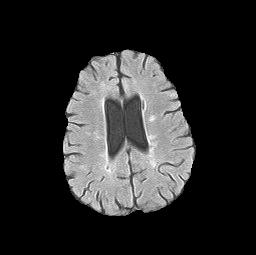

In [38]:
coins

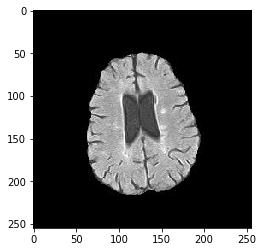

In [39]:
plt.imshow(coins, cmap='gray');

In [43]:
from skimage import filters

coins_denoised = filters.median(coins, selem=np.ones((5, 5),dtype=tf.int16))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised);

NameError: name 'tf' is not defined

In [42]:
from skimage import feature
edges = skimage.feature.canny(coins, sigma=3)

plt.imshow(edges);

AttributeError: 'JpegImageFile' object has no attribute 'dtype'

In [ ]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);

In [ ]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [ ]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:5]

In [ ]:
plt.plot(peak_idx[1], peak_idx[0], 'r.')
plt.imshow(dt);

In [ ]:
from skimage import measure

markers = measure.label(local_max)

In [ ]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(coins, labels));

In [ ]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=coins));

In [ ]:
plt.imshow(color.label2rgb(labels, image=coins, kind='avg'), cmap='gray');

In [ ]:
regions = measure.regionprops(labels, intensity_image=coins)

In [ ]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

In [ ]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

In [ ]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

In [ ]:
plt.imshow(color.label2rgb(classified_labels, image=coins));

In [46]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

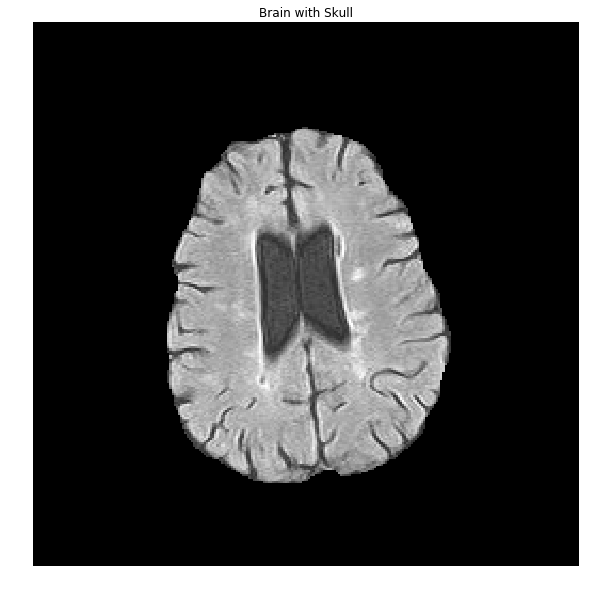

In [49]:
img= cv2.imread('C:/Users/Bipasha Roy/IMAGE PROCESSING/brain.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

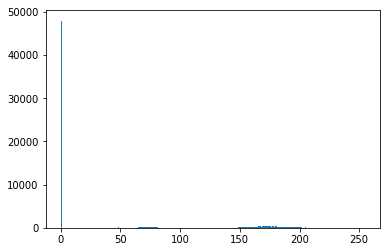

In [50]:
plt.hist(gray.ravel(),256)
plt.show()

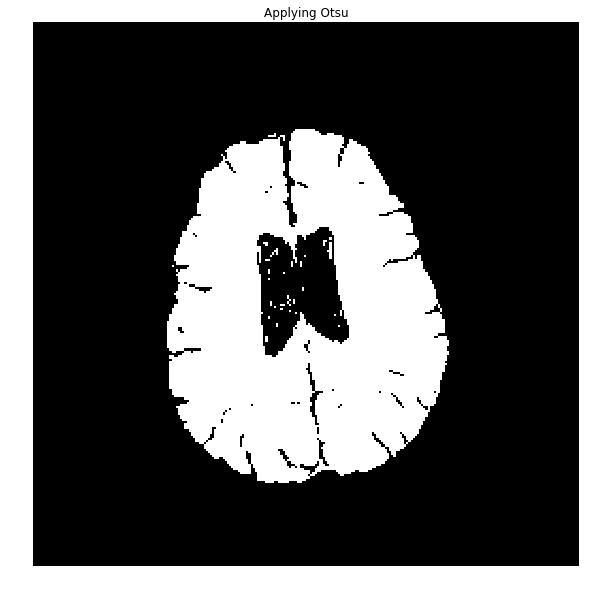

In [51]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

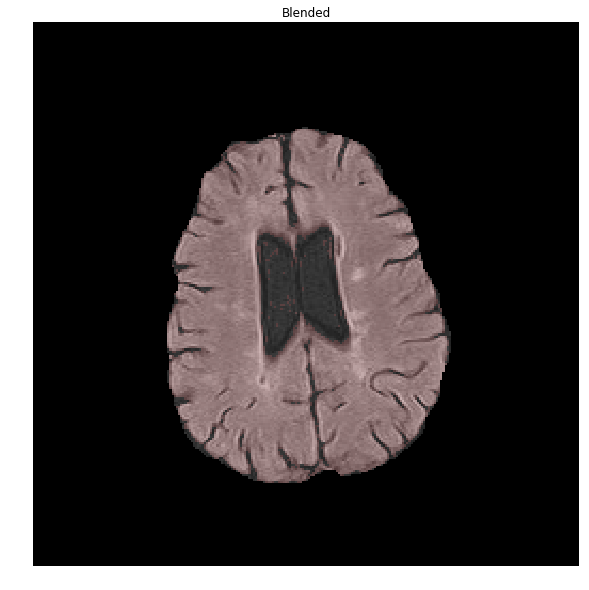

In [52]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

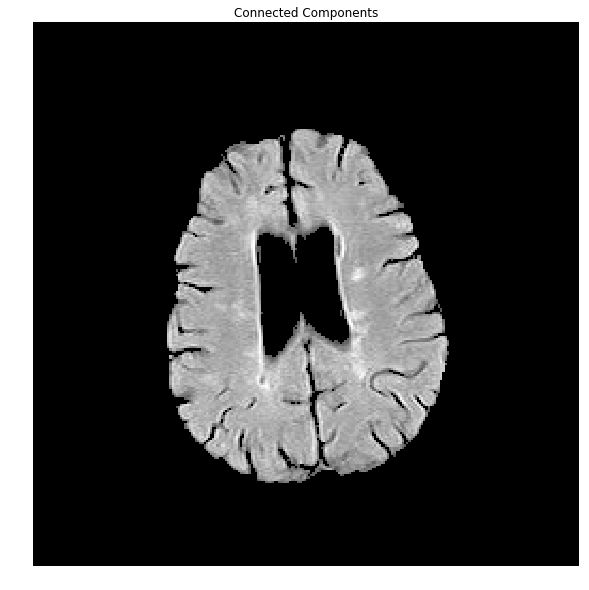

In [53]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

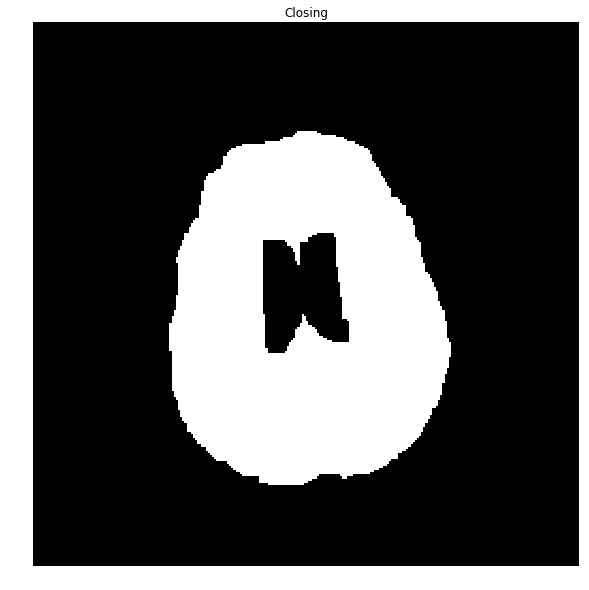

In [54]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

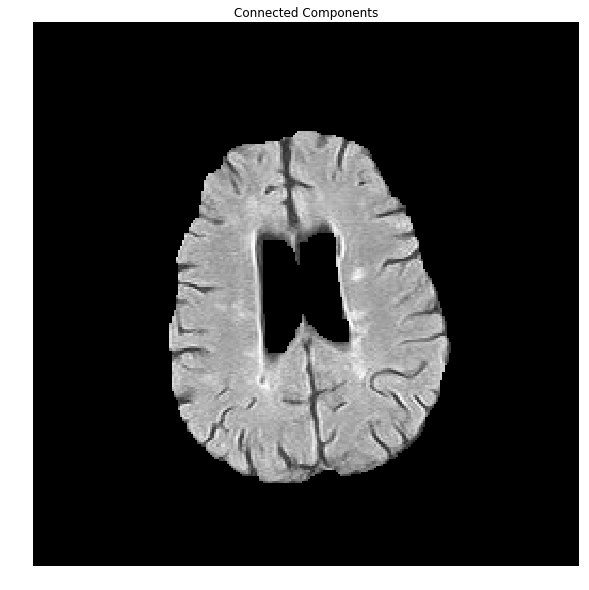

In [55]:
brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[closing==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import cv2
def get_brain(img):
  row_size = img.shape[0]
  col_size = img.shape[1]

  mean = np.mean(img)
  std = np.std(img)
  img = img - mean
  img = img / std

  middle = img[int(col_size / 5):int(col_size / 5 * 4), int(row_size / 5):int(row_size / 5 * 4)]
  mean = np.mean(middle)
  max = np.max(img)
  min = np.min(img)


  img[img == max] = mean
  img[img == min] = mean

  kmeans = KMeans(n_clusters=2).fit(np.reshape(middle, [np.prod(middle.shape), 1]))
  centers = sorted(kmeans.cluster_centers_.flatten())
  threshold = np.mean(centers)
  thresh_img = np.where(img < threshold, 1.0, 0.0)  # threshold the image


  eroded = morphology.erosion(thresh_img, np.ones([3, 3]))
  dilation = morphology.dilation(eroded, np.ones([5, 5]))

In [2]:
get_brain('brain.tif')


AttributeError: 'str' object has no attribute 'shape'

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster

from skimage import data
from PIL import Image
img = Image.open('brain.tif')

img = ndimage.imread("brain.tif")
plt.figure(figsize = (15,8))
plt.imshow(img)

In [ ]:
row_size = img.shape[0]
col_size = img.shape[1]

mean = np.mean(img)
std = np.std(img)
img = img - mean
img = img / std

middle = img[int(col_size / 5):int(col_size / 5 * 4), int(row_size / 5):int(row_size / 5 * 4)]
mean = np.mean(middle)
max = np.max(img)
min = np.min(img)


img[img == max] = mean
img[img == min] = mean

kmeans = KMeans(n_clusters=2).fit(np.reshape(middle, [np.prod(middle.shape), 1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img < threshold, 1.0, 0.0)  # threshold the image


eroded = morphology.erosion(thresh_img, np.ones([3, 3]))
dilation = morphology.dilation(eroded, np.ones([5, 5]))

In [ ]:
from numpy import array
from scipy.misc import toimage
imm=toimage(eroded)
imm

In [ ]:
imm=toimage(dilation)
imm
plt.imshow(imm)

In [ ]:
threshold

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


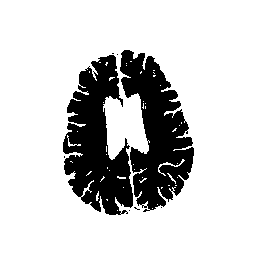

In [87]:
imm=toimage(thresh_img)
imm
